## Analyse Nutzung
Überblick über die Nutzungsart der Gebäude

In [4]:
import package.charts as charts
import package.importer as im
import seaborn as sns

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_dataset('package/dataset.csv')


#### Volumen RI SIA 116

In [5]:
df[im.FIELD_VOLUME_TOTAL_116].describe()

count       461.000000
mean      27656.817787
std       37574.682928
min         356.000000
25%        6484.000000
50%       16735.000000
75%       32880.000000
max      315370.000000
Name: volume_total_116, dtype: float64

#### Volumen GV SIA 416

In [6]:
df[im.FIELD_VOLUME_TOTAL_416].describe()

count       520.000000
mean      21978.792308
std       32656.222237
min         167.000000
25%        4433.750000
50%       11037.500000
75%       25658.000000
max      272000.000000
Name: volume_total_416, dtype: float64

### Vergleich
Abweichung **absolut**

In [14]:
volume_df = df.copy().loc[:, [im.FIELD_VOLUME_TOTAL_416, im.FIELD_VOLUME_TOTAL_116]]
volume_df = volume_df.dropna()
volume_df['diff_volume'] = volume_df.eval(f'{im.FIELD_VOLUME_TOTAL_416} - {im.FIELD_VOLUME_TOTAL_116}').abs()
volume_df['diff_volume'].describe()

count      196.000000
mean      2874.647959
std       4418.722534
min         39.000000
25%        393.750000
50%       1384.500000
75%       3084.000000
max      29248.000000
Name: diff_volume, dtype: float64

Abweichung in **Prozent**

In [17]:
volume_df['diff_volume_percent'] = (df[im.FIELD_VOLUME_TOTAL_116] - volume_df[im.FIELD_VOLUME_TOTAL_416]) / volume_df[im.FIELD_VOLUME_TOTAL_116] * 100
volume_df['diff_volume_percent'].describe()

count    196.000000
mean      13.118995
std        8.227657
min        0.475782
25%        8.103030
50%       11.241222
75%       16.524326
max       48.296122
Name: diff_volume_percent, dtype: float64

### Volumen und Ausgaben
Zeigt **Volumen** in relation zu den **Gesamtausgaben**.
(Weisen hohe Korrelation auf und könnten ggf. auch hohe Korrelation zu Geschossfläche aufweisen)

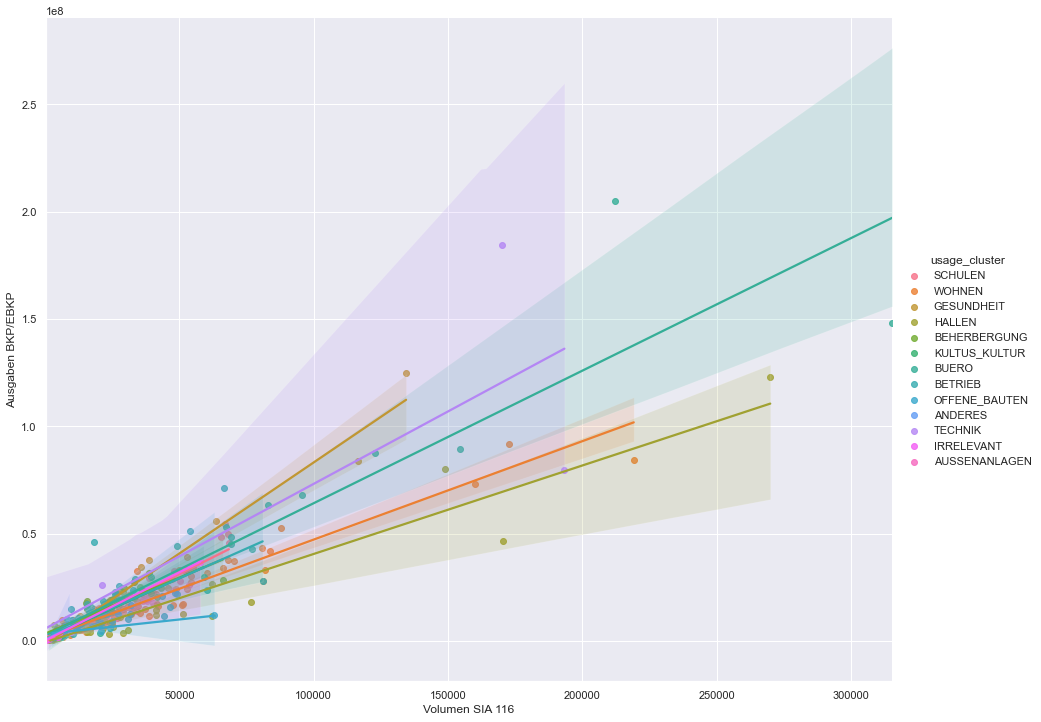

In [15]:
gf = sns.lmplot(
    data=df,
    x=im.FIELD_VOLUME_TOTAL_116, y=im.FIELD_TOTAL_EXPENSES,
    hue=im.FIELD_USAGE_CLUSTER,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
)

gf.set(xlabel='Volumen SIA 116', ylabel='Ausgaben BKP/EBKP')